<a href="https://colab.research.google.com/github/rossl18/rossl18.github.io/blob/main/HPSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
'''
This project aims to predict an individual’s likely Harry Potter house based on responses
to a series of personality  questions. Using survey data collected from my friends and family,
I leveraged machine learning—specifically, a Support Vector Machine (SVM), to classify respondents into one of
two house groups. The steps involved include data collection, preprocessing, feature engineering, modeling, and visualization.

To begin, responses on traits like bravery, leadership, and success are gathered, cleaned, and scaled for consistency.
Feature engineering is then applied to enhance model accuracy by introducing combined features, such as a "Bravery * Leadership"
trait, which reflects how specific traits might align with house characteristics. A baseline SVM model is first trained with a
linear kernel, then improved with an RBF kernel to better capture more complex relationships in the data.

The project also utilized visualization by plotting the SVM decision boundaries in both 3D and 2D. These visualizations illustrate
the classification process, showing how different responses influence house groupings through hyperplanes in 3D space and decision
boundaries in 2D projections. The final results provide a model that connects personality traits with house affiliations, and
diplsays how the steps taken in feature engineering and optimization allow for higher accuracy.

'''

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
file_path = 'SVMResponses.csv'
data = pd.read_csv(file_path)

# Data Preparation and Cleaning
# Map Gryffindor/Slytherin to 1, and Hufflepuff/Ravenclaw to 0
house_group_mapping = {'Gryffindor': 1, 'Slytherin': 1, 'Hufflepuff': 0, 'Ravenclaw': 0}
data_cleaned = data.drop(columns=['Timestamp', 'Column 1'])
data_cleaned['House_Group'] = data_cleaned['What is your self proclaimed Harry Potter House?'].map(house_group_mapping)
data_cleaned = data_cleaned.dropna(subset=['House_Group']).drop(columns=['What is your self proclaimed Harry Potter House?'])

#Predictors and Response
X = data_cleaned.drop(columns=['House_Group']).values
y = data_cleaned['House_Group'].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 1. Standard SVM Model Training (Linear Kernel without PCA or Feature Engineering)
svm_model_standard = SVC(kernel='linear', C=1.0)
svm_model_standard.fit(X_train, y_train)
standard_accuracy = svm_model_standard.score(X_test, y_test)

# Improved Model with Feature Engineering (Bravery * Leadership Score) and PCA
data_fe = data_cleaned.copy()
data_fe['Bravery_Leadership'] = data_fe['How Brave Are You?'] * data_fe[' How often do you find yourself taking the lead in group situation?']
X_fe = data_fe.drop(columns=['House_Group']).values
y_fe = data_fe['House_Group'].values

# Standardize new feature set and apply PCA for dimensionality reduction
X_fe_scaled = scaler.fit_transform(X_fe)
pca = PCA(n_components=3)
X_fe_pca = pca.fit_transform(X_fe_scaled)

# Split modified dataset
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe_pca, y_fe, test_size=0.3, random_state=42)

# Improved SVM with RBF Kernel (for accuracy) and Linear Kernel (for visualization)
svm_model_fe_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model_fe_rbf.fit(X_train_fe, y_train_fe)
improved_accuracy_rbf = svm_model_fe_rbf.score(X_test_fe, y_test_fe)

# Re-train improved SVM with linear kernel to visualize hyperplane
svm_model_fe_linear = SVC(kernel='linear', C=1.0)
svm_model_fe_linear.fit(X_train_fe, y_train_fe)
w_fe = svm_model_fe_linear.coef_[0]
b_fe = svm_model_fe_linear.intercept_[0]



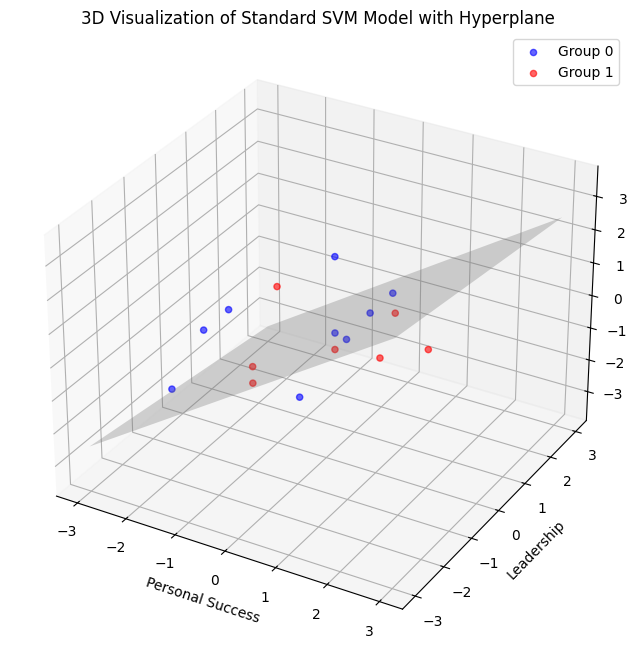

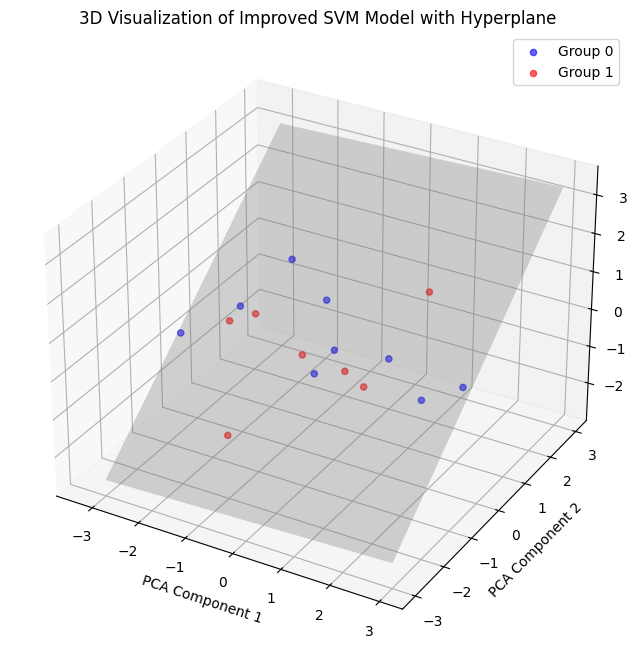

In [3]:
# Import necessary libraries for 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# Define w_standard and b_standard for the Standard Model
w_standard = svm_model_standard.coef_[0]  # Weights for the hyperplane
b_standard = svm_model_standard.intercept_[0]  # Intercept for the hyperplane

# Set up mesh grid for plotting hyperplane
xx, yy = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10))

# 3D Plot for Standard Model
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot for each group in the standard model
ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], X_train[y_train == 0, 2], c='blue', label='Group 0', alpha=0.6)
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], X_train[y_train == 1, 2], c='red', label='Group 1', alpha=0.6)
# Plot hyperplane
zz_standard = (-w_standard[0] * xx - w_standard[1] * yy - b_standard) / w_standard[2]
ax.plot_surface(xx, yy, zz_standard, color='gray', alpha=0.3, rstride=100, cstride=100, edgecolor='none')
ax.set_xlabel('Personal Success')
ax.set_ylabel('Leadership')
ax.set_zlabel('Bravery')
ax.set_title('3D Visualization of Standard SVM Model with Hyperplane')
ax.legend()
plt.show()

# 3D Plot for Improved Model (with Feature Engineering and PCA)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot for each group in the improved model
ax.scatter(X_train_fe[y_train_fe == 0, 0], X_train_fe[y_train_fe == 0, 1], X_train_fe[y_train_fe == 0, 2], c='blue', label='Group 0', alpha=0.6)
ax.scatter(X_train_fe[y_train_fe == 1, 0], X_train_fe[y_train_fe == 1, 1], X_train_fe[y_train_fe == 1, 2], c='red', label='Group 1', alpha=0.6)
# Plot hyperplane
zz_improved = (-w_fe[0] * xx - w_fe[1] * yy - b_fe) / w_fe[2]
ax.plot_surface(xx, yy, zz_improved, color='gray', alpha=0.3, rstride=100, cstride=100, edgecolor='none')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D Visualization of Improved SVM Model with Hyperplane')
ax.legend()
plt.show()


In [ ]:
# Set up 2D Projections with Decision Boundary Cross Sections
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
x_range = np.linspace(-3, 3, 100)  # Range for plotting

# XY plane: Plotting line using w[0] and w[1]
axs[0].scatter(X_train_fe[y_train_fe == 0, 0], X_train_fe[y_train_fe == 0, 1], color='blue', label='Group 0', alpha=0.6)
axs[0].scatter(X_train_fe[y_train_fe == 1, 0], X_train_fe[y_train_fe == 1, 1], color='red', label='Group 1', alpha=0.6)
axs[0].plot(x_range, (-w_fe[0] * x_range - b_fe) / w_fe[1], 'k--')  # Decision boundary
axs[0].set_xlabel('PCA Component 1')
axs[0].set_ylabel('PCA Component 2')
axs[0].set_title('XY Plane')
axs[0].legend()

# XZ plane: Plotting line using w[0] and w[2]
axs[1].scatter(X_train_fe[y_train_fe == 0, 0], X_train_fe[y_train_fe == 0, 2], color='blue', label='Group 0', alpha=0.6)
axs[1].scatter(X_train_fe[y_train_fe == 1, 0], X_train_fe[y_train_fe == 1, 2], color='red', label='Group 1', alpha=0.6)
axs[1].plot(x_range, (-w_fe[0] * x_range - b_fe) / w_fe[2], 'k--')  # Decision boundary
axs[1].set_xlabel('PCA Component 1')
axs[1].set_ylabel('PCA Component 3')
axs[1].set_title('XZ Plane')
axs[1].legend()

# YZ plane: Plotting line using w[1] and w[2]
axs[2].scatter(X_train_fe[y_train_fe == 0, 1], X_train_fe[y_train_fe == 0, 2], color='blue', label='Group 0', alpha=0.6)
axs[2].scatter(X_train_fe[y_train_fe == 1, 1], X_train_fe[y_train_fe == 1, 2], color='red', label='Group 1', alpha=0.6)
axs[2].plot(x_range, (-w_fe[1] * x_range - b_fe) / w_fe[2], 'k--')  # Decision boundary
axs[2].set_xlabel('PCA Component 2')
axs[2].set_ylabel('PCA Component 3')
axs[2].set_title('YZ Plane')
axs[2].legend()

plt.suptitle("2D Projections with Decision Boundary in Feature Components")
plt.show()

# Display the accuracy of the standard and improved models
print(f"Standard Model Accuracy: {standard_accuracy * 100:.2f}%")
print(f"Improved Model (RBF Kernel) Accuracy: {improved_accuracy_rbf * 100:.2f}%")